# Lab 5 - Probability and Simpson’s Paradox
### Chile Peppers
### Authors: 
  - "Kyle Aswege"
  - "Pouya Jalali Khalilabadi"
  - "Shreya Vikas Kolte "
  - "Issiah John
  - "Derek Rice"
### 
### Date: 22-NOV-2024

::: callout-important
This is a *Team* Lab, meaning you can and should work with your project team on it.
:::

## Packages

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction

In this lab you'll review and get practice with a variety of concepts, methods, and tools you've encountered thus far, with a focus on misrepresentation and ethics.

## Learning objectives

By the end of the lab, you will...

-   Calculate single event, conditional, and "and" probabilities.
-   Interpret probabilities in the context of the problem.
-   Display a fundamental understanding of Simpson's Paradox.
-   Practice teamwork and collaboration on GitHub.

## Guidelines

As we've discussed in lecture, your plots should include an informative title, axes should be labeled, and careful consideration should be given to aesthetic choices.

::: callout-note
Remember that continuing to develop a sound workflow for reproducible data analysis is important as you complete the lab and other assignments in this course.
There will be periodic reminders in this assignment to remind you to **Run all, commit, and sync** your changes to GitHub.
You should have at least 3 commits with meaningful commit messages by the end of the assignment.
:::

# Getting started

All team members should clone the team GitHub repository for the lab.
Then, one team member should edit the document Markdown cell by adding the team name to the `Team name` field and adding the names of the team members contributing to lab to the `Authors` field.
Hopefully that's everyone, but if someone doesn't contribute during the lab session or throughout the week before the deadline, their name should not be added.
If you have 4 members in your team, you can delete the line for the 5th team member.
Then, this team member should render the document and commit and push the changes.
All others should **not** touch the document at this stage.

``` markdown
# Lab 5 - Probability and Simpson’s Paradox
### Chile Peppers
### Authors: 
  - "Kyle Aswege"
  - "Pouya Jalali Khalilabadi"
  - "Shreya Vikas Kolte "
  - "Issiah John
  - "Derek Rice"
### 
### Date: 22-NOV-2024
```


# Questions

::: callout-important
Pick another member of the team write the answer to Part 1.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::


## Part 1 - Probability and you

### Question 1

We use probabilities all the time when making decisions.
*As a group*, provide *two* real world examples of when you've used probability to make decisions in your every day life.
Think critically.
Be creative.

## Example 

Probabilities are used everyday - when in Arizona do you always travel with water, at what probability of rain do you travel with an umbrella. 

One example is the purchase of insurance for a car or a house. When making the decision we often consider the probability or likelihood of damage or a severe event. Hoping the probability of severe damage is low we try to justify cheap insurance but often have regrets because the event materializes. Then, there are the people, who experience catastrophic events, floods, forest fire, serious car accident and are in dire need of full insurance coverage. So insurance is a balance act between the likelihood of an undesired event, risk tolerance, and how much a person is willing to pay to minimize their risk exposure. 

A second example is a warranty. Often when buying expensive goods the extended warranty is an additional cost, 10% of the purchase price for example. So the decision is what is the probability the device fail in the next 36 months? Dell PC insurance is $200/year for example. The warranty is amazing when stuff breaks - but a significant additional expense. 

::: callout-important
After the team member working on Part 1 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 2.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 2 - Risk of coronary heart disease

This data set is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
We want to examine the relationship between various health characteristics and the risk of having heart disease.

### Question 2

Load in the data set called `education-disease` and answer the following questions below.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
data = pd.read_csv(r'data\education-disease.csv')

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
# note:
# because below you ask for the levels of disease and the dataset includes three diseases (i) stroke, (ii) hypertension, and (iii) diabeters we created a new column
# and in that new column I identify the diseases or 'none' for each row. 
# not sure if this is what you are expecting but it is my reading of the exercise? 

def disease_col(row):
    if row['prevalentStroke'] == 1:
        return "stroke"
    if row['prevalentHyp'] == 1:
        return "hypertension"
    if row['diabetes'] == 1:
        return "diabetes"
    else:
        return 'healthy'

data['disease_state'] = data.apply(disease_col, axis=1)

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,disease_state
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,healthy
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,healthy
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,healthy
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,hypertension
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,healthy


### Question 3

How many levels of education are there in these data?
How many levels of disease are there?
**Hint:** The `unique()` function might be helpful.


In [18]:
levels_education = data['education'].unique()
levels_prevalentStroke = data['prevalentStroke'].unique()
levels_prevalentHyp = data['prevalentHyp'].unique()
levels_diabetes = data['diabetes'].unique()
levels_disease = data['disease_state']. unique()

print(f'The dataset incudes:\n')
print(f'Levels of Education: {levels_education}\n')
print(f'Disease includes three conditions (i) Prevalent Stroke, (ii) Prevalent Hypertension, and (iii) Diabetes.\n')
print(f'The levels of (i) Prevalent Stroke are: {levels_prevalentStroke}')
print(f'The levels of (ii) Prevalent Hypertension are :{levels_prevalentHyp}')
print(f'The levels of (iii) Diabetes are: {levels_diabetes}')

print(f'\n Note sure if this is what you are looking for but I created a column disease_state and using that column there are these levels of disease:\n {levels_disease}')


The dataset incudes:

Levels of Education: [ 4.  2.  1.  3. nan]

Disease includes three conditions (i) Prevalent Stroke, (ii) Prevalent Hypertension, and (iii) Diabetes.

The levels of (i) Prevalent Stroke are: [0 1]
The levels of (ii) Prevalent Hypertension are :[0 1]
The levels of (iii) Diabetes are: [0 1]

 Note sure if this is what you are looking for but I created a column disease_state and using that column there are these levels of disease:
 ['healthy' 'hypertension' 'diabetes' 'stroke']


### Question 4

Convert the data to a two-way table where each cell is the number of people falling into each combination of Disease and Education.
**Hint:** Use `groupby` and `pivot_table`.
Your answer should be a 4x3 data frame with counts in each cell.


In [19]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,disease_state
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,healthy
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,healthy
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,healthy
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,hypertension
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,healthy


In [20]:
dataset = data[['education','disease_state']]

two_way_table = dataset.pivot_table(index='education', columns='disease_state',aggfunc='size',fill_value=0)

move_col = two_way_table.pop('healthy')
two_way_table['healthy'] = move_col

print(f'The education levels are:\n\n1.0 = 0-11 years\n2.0 = high school diploma (GED)\n3.0 = some college or vocational school\n4.0 College (BS, BA) degree or more')

# ref. https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation_2021a.pdf?utm_source=chatgpt.com


print('\n\nThe two-way table where each cell is the number of people falling into each combination of Disease and Education.:')
two_way_table.head()

The education levels are:

1.0 = 0-11 years
2.0 = high school diploma (GED)
3.0 = some college or vocational school
4.0 College (BS, BA) degree or more


The two-way table where each cell is the number of people falling into each combination of Disease and Education.:


disease_state,diabetes,hypertension,stroke,healthy
education,,,,
1.0,24,607,15,1074
2.0,12,356,7,878
3.0,8,177,3,501
4.0,6,128,0,339


Using the summary table you created above, answer the remaining questions.
You do not have to use Python functions for your calculations, you can use Python as a calculator using the values from the summary table.
Make sure to show your work, i.e., instead of reporting just the final answer, use Python to calculate that in a way we can see the counts you've used along the way.


### Question 5

What is the probability of a random individual having high school or GED education and not being high risk for cardiovascular disease?

In [21]:
# Values from the two-way table
healthy_education_2 = 878  # Number of healthy individuals with high school (GED) education (Education Level = 2.0)

# Total number of individuals in the dataset (sum of all cells in the table)
total_individuals = two_way_table.values.sum()

# Probability calculation
probability = healthy_education_2 / total_individuals

total_individuals, probability


(np.int64(4135), np.float64(0.21233373639661426))

$$
\text{Healthy individuals with education level 2.0: } 878
$$

$$
\text{Total individuals in the dataset: } 4,135
$$

$$
P(\text{Healthy} \mid \text{Education Level 2.0}) = \frac{878}{4135} = 0.2123 \, (21.23\%)
$$

$$
\text{Thus, the probability is } 0.2123 \, (21.23\%).
$$
21.23\%).
$$


Question 5 - alternative answer (What is the probability of a random individual having high school or GED education and not being high risk for cardiovascular disease?)

- P(Level 2 education) * (1 - P(of cardio disease))

- P(level 2 education) * P(healthy)

- P(level 2 education) = 1253 / 4135 = 0.30  
- P(healthy) = 2792 / 4135 = 0.68

- P(level 2 ed)* P(healthy) = 0.3*0.68 = 0.20

- solution: Prob. random person has both (i) GED and (ii) healthy = 0.20


### Question 6

What is the probability that a random individual who is already high risk for cardiovascular disease has a college education?

In [22]:
# High risk individuals are those who are NOT "healthy"
high_risk_counts = two_way_table[['diabetes', 'hypertension', 'stroke']].sum(axis=1)
college_high_risk = high_risk_counts.loc[4.0]  # High risk with college education (Education Level = 4.0)

# Total high risk individuals in the dataset
total_high_risk = high_risk_counts.sum()

# Probability calculation
probability_high_risk_college = college_high_risk / total_high_risk

college_high_risk, total_high_risk, probability_high_risk_college


(np.int64(134), np.int64(1343), np.float64(0.09977661950856292))

$$
\text{High-risk individuals with college education: } 134
$$

$$
\text{Total high-risk individuals in the dataset: } 1,343
$$

$$
P(\text{College Education} \mid \text{High Risk}) = \frac{134}{1343} = 0.0998 \, (9.98\%)
$$

$$
\text{Thus, the probability is } 0.0998 \, (9.98\%).
$$


Question 6 - alternative Bayes's Rule approach (What is the probability that a random individual who is already high risk for cardiovascular disease has a college education?)

P(A|B) = P(B|A) * P(A) / P(B)

A: college education 
B: cardiovascular disease



P(A|B) = probability (has college ed | given they have a cardio disease) = P(cardio disease | given college education) * P(college ed) / P(cardio disease)

P(A) = 473/4135 = 0.11 #473 people with college education and 4135 total people 
P(B) = 1343/4135 = 0.32 #1343 people with cardio disease and 4135 total people 

P(B|A) = 134/473 = 0.28 # number with cardio disease

P(A|B) = 0.28 * 0.11 / 0.32 = 0.096

soln:

P(college ed | cardio disease) = 0.096

::: callout-important
After the team member working on Part 2 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 3.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 3 - Bike rentals

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
You are tasked to investigate the relationship between the temperature outside and the number of bikes rented in the Washington DC area between the years 2011 and 2022.
You will be investigating data for the months June, July, September, and November.

Below is a list of variables and their definitions:

| Variable  | Definition                                                                     |
|------------------|------------------------------------------------------|
| `season`  | Numerical representation of Spring (2), Summer (3), and Fall (4)               |
| `year`    | Numerical representation of 2011 (0) or 2012 (1)                               |
| `month`   | Month in which data were collected                                             |
| `holiday` | Indicator variable for whether data were collected on a holiday (1) or not (0) |
| `weekday` | Numerical representation of day of week                                        |
| `temp`    | Temperature in Celsius                                                         |
| `count`   | Number of bike rentals for that day                                            |

### Question 7

(a) Read in the `bike` data.
    Then, create a scatter plot that investigates the relationship between the number of bikes rented and the temperature outside.
    Include a straight line of best fit to help discuss the discovered relationship.
    Summarize your findings in 2-3 sentences.

(b) Another researcher suggests to look at the relationship between bikes rented and temperature by each of the four months of interest.
    Recreate your plot in part a, and color the points by month.
    Include a straight line for each of the four months to help discuss each month's relationship between bikes rented and temperature.
    In 3-4 sentences, summarize your findings.

In [23]:
bike_data = pd.read_csv('data/bike.csv')  

bike_data.head(10)

,season,year,month,holiday,weekday,temp,count
0,2,0,6,0,3,27.915849,3974
1,2,0,6,0,4,25.605000,4968
2,2,0,6,0,5,21.140000,5312
3,2,0,6,0,6,21.845000,5342
4,2,0,6,0,0,22.471651,4906
5,2,0,6,0,1,23.881651,4548
6,2,0,6,0,2,25.252500,4833
7,2,0,6,0,3,28.464151,4401
8,2,0,6,0,4,29.991651,3915
9,2,0,6,0,5,27.485000,4586


In [24]:
print(bike_data.info)

<bound method DataFrame.info of      season  year  month  holiday  weekday       temp  count
0         2     0      6        0        3  27.915849   3974
1         2     0      6        0        4  25.605000   4968
2         2     0      6        0        5  21.140000   5312
3         2     0      6        0        6  21.845000   5342
4         2     0      6        0        0  22.471651   4906
..      ...   ...    ...      ...      ...        ...    ...
237       4     1     11        0        1   6.726651   5087
238       4     1     11        0        2   5.708349   3959
239       4     1     11        0        3   5.943349   5260
240       4     1     11        0        4   5.200890   5323
241       4     1     11        0        5   6.021651   5668

[242 rows x 7 columns]>


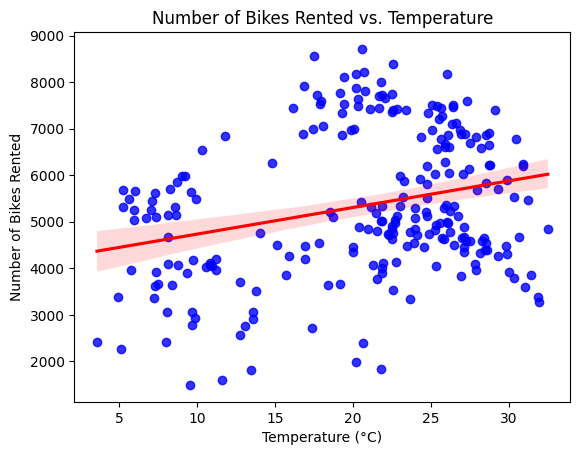

In [25]:
sns.regplot(data=bike_data, x='temp', y='count', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Number of Bikes Rented vs. Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bikes Rented")
plt.show()

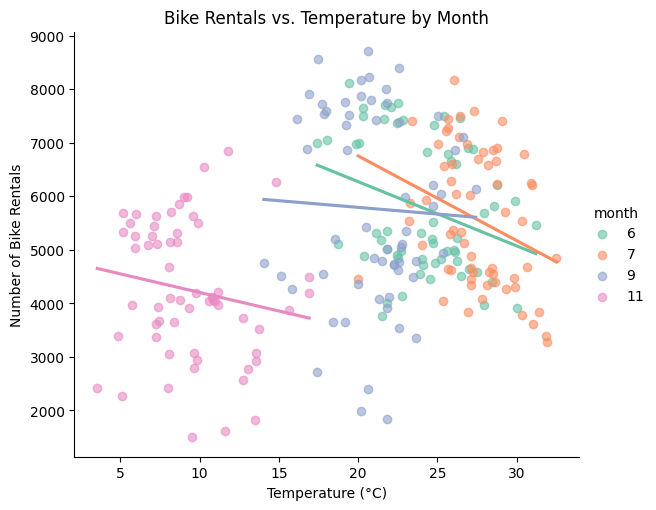

In [26]:
sns.lmplot(
    data=bike_data,
    x='temp',
    y='count',
    hue='month',
    palette='Set2',
    ci=None,
    scatter_kws={'alpha': 0.6},
    height=5,
    aspect=1.2
)
plt.title("Bike Rentals vs. Temperature by Month")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Bike Rentals")
plt.show()

### Answer 7

Although the overall trend showed that higher temperatures were associated with increased bike rentals, the monthly analysis revealed a different pattern. For  months, higher temperatures were linked to lower bike rentals, highlighting variations in the relationship when examined on a monthly basis.

Please watch the following video on Simpson's Paradox [here](https://www.youtube.com/watch?v=ebEkn-BiW5k).
After you do, please answer the following questions.

### Question 8

In your own words, summarize Simpson's Paradox in 2-3 sentences.

### Answer 8

Simpson’s Paradox is a statistical phenomenon where a trend observed in aggregated data reverses or disappears when the data is divided into subgroups. It illustrates how it’s possible to draw two opposite conclusions from the same dataset depending on how it is divided. Statistics alone cannot solve this paradox; we often need additional context to understand the causality behind the situation at hand. This highlights the importance of analyzing data thoughtfully to uncover the true underlying relationships.

### Question 9

Compare and contrast your findings from part (a) and part (b).
What's different?

### Answer 9

In part (a), we observed a general upward trend: as temperatures increased, so did bike rentals, which could be seen as a simple positive relationship. This is similar to the example in the video where more money leads to more happiness for both cats and people. However, when we break the data down by month, as in part (b), the trend shifts. In some months, higher temperatures actually correspond to fewer bike rentals, which is a contradiction to the overall trend. This is reminiscent of the paradox shown in the video, where more money might make both cats and people sadder individually, but when viewed in aggregate, it can appear that more money makes people happier due to their higher initial happiness and wealth.
Similarly, in our case, while the overall data suggests a positive relationship between temperature and bike rentals, breaking it down by months reveals a more complex story. The monthly data shows that other factors, like seasonality or specific conditions in each month, can influence bike rental patterns differently, leading to a paradox where the overall trend does not align with the individual sub-trends. This is a classic case of Simpson's Paradox, where the aggregation of data hides or reverses the underlying relationships.

### Question 10

Think critically about your answer to part d.
What other context from this study could be creating this paradox?
That is, identify a potential confounding

### Answer 10

A potential confounding factor in this study could be seasonality. During warmer months, other factors like special events, holidays, or increased tourism could influence bike rentals, regardless of temperature. Additionally, people may have more free time or may prefer biking during certain months, further complicating the relationship between temperature and rentals. Local factors like humidity or air quality could also play a role, making it more difficult to see a direct link between temperature and bike rentals.

# Closing an issue with a commit

Go to your GitHub repository, you will see an issue with the title "Learn to close an issue with a commit".

Your goal is to close this issue with a commit to practice this workflow, which is the workflow you will use when you are addressing feedback on your projects.

-   Go to the relevant section in your lab .ipynb file.
-   Delete the sentence that says "Delete me".
-   Render the document.
-   Commit your changes from the git tab with the commit message *"Delete sentence, closes #1."*
-   Push your changes to your repo and observe that the issue is now closed and the commit associated with this move is linked from the issue.

GitHub allows you to close an issue directly with commits if the commit uses one of the following keywords followed bu the issue number (which you can find next to the issue title): close, closes, closed, fix, fixes, fixed, resolve, resolves, and resolved.


# Wrap-up

## Submission

::: callout-warning
Before you wrap up the assignment, make sure all of your documents are updated on your GitHub repo.
We will be checking these to make sure you have been practicing how to commit and push changes.

You must turn in the .ipynb file by the submission deadline to be considered "on time".
:::

::: callout-important
## Checklist

Make sure you have:

-   attempted all questions
-   run all code in your Jupyter notebook
-   committed and pushed everything to your GitHub repository such that the Git pane in VS Code is empty
:::

## Grading

The lab is graded out of a total of 50 points.

On Questions 1 through 10, you can earn up to 5 points on each question:

-   5: Response shows excellent understanding and addresses all or almost all of the rubric items.

-   4: Response shows good understanding and addresses most of the rubric items.

-   3: Response shows understanding and addresses a majority of the rubric items.

-   2: Response shows effort and misses many of the rubric items.

-   1: Response does not show sufficient effort or understanding and/or is largely incomplete.

-   0: No attempt.
